<a href="https://colab.research.google.com/github/rzbsys/EMNSIT-KNN-Example/blob/main/%EC%95%8C%ED%8C%8C%EB%B2%B3_%EB%B6%84%EB%A5%98_KNN_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **알파벳 분류 KNN 모델 만들기**

구글 코랩(Colab)을 사용하여  A~Z 까지의 알파벳과 0~9까지의 숫자를 분류하는 프로그램입니다.

## **데이터 준비하기**

<img src="https://raw.githubusercontent.com/rzbsys/EMNSIT-KNN-Example/main/EMNSIT.png" height="150px" align="left"/> 
MNIST 데이터베이스 (Modified National Institute of Standards and Technology database)는 손으로 쓴 숫자들로 이루어진 대형 데이터베이스이며, 다양한 화상 처리 시스템을 트레이닝하기 위해 일반적으로 사용된다. EMNIST의 경우 기존의 MNSIT 를 확장하여 A~Z까지 알파벳이 추가된 버전이다.

학습에 사용할 데이터셋을 불러옵니다.

In [3]:
#@title 데이터셋 다운로드
!gdown --id 10lGU3mkpH7YcPXfojc-SCprtBEqJkF7W
!unzip /content/handwriting.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10lGU3mkpH7YcPXfojc-SCprtBEqJkF7W
To: /content/handwriting.zip
100% 1.74G/1.74G [00:19<00:00, 87.7MB/s]


## **데이터 읽어오기**

<img src="https://raw.githubusercontent.com/rzbsys/EMNSIT-KNN-Example/main/opencv.png" align="left" height="150px"/>

Python의 OpenCV 라이브러리는 이미지 처리를 위해 만들어진 라이브러리입니다. 이 라이브러리를 사용하여 이미지를 불러올 수 있고, 해상도 변경, 색 영역 변경 등이 가능합니다. 

OpenCV 라이브러리를 사용하여 다운받은 이미지를 불러옵니다.

In [84]:
#@title 데이터셋 불러오기
import os
from tqdm import tqdm
import cv2

tar = '/content/Train/'

X_train = []
Y_train = []

for index, digit in enumerate(os.listdir(tar)):
  print(f"{index} Read Dataset : {digit}")
  datasets = os.listdir(os.path.join(tar, digit))
  for dataset in tqdm(datasets):
    img = cv2.imread(os.path.join(tar, digit, dataset), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32)) / 255.0
    X_train.append(img)
    Y_train.append(digit)

0 Read Dataset : 1


100%|██████████| 43773/43773 [00:33<00:00, 1316.40it/s]


1 Read Dataset : 2


100%|██████████| 39351/39351 [00:29<00:00, 1330.20it/s]


2 Read Dataset : 4


100%|██████████| 38112/38112 [00:33<00:00, 1146.08it/s]


3 Read Dataset : S


100%|██████████| 25911/25911 [00:19<00:00, 1330.91it/s]


4 Read Dataset : 5


100%|██████████| 32317/32317 [00:24<00:00, 1337.65it/s]


5 Read Dataset : L


100%|██████████| 21648/21648 [00:15<00:00, 1362.53it/s]


6 Read Dataset : F


100%|██████████| 11636/11636 [00:08<00:00, 1377.82it/s]


7 Read Dataset : Q


100%|██████████| 4707/4707 [00:03<00:00, 1439.48it/s]


8 Read Dataset : A


100%|██████████| 17205/17205 [00:13<00:00, 1307.37it/s]


9 Read Dataset : X


100%|██████████| 5106/5106 [00:03<00:00, 1366.57it/s]


10 Read Dataset : N


100%|██████████| 21421/21421 [00:16<00:00, 1308.68it/s]


11 Read Dataset : E


100%|██████████| 32627/32627 [00:23<00:00, 1409.39it/s]


12 Read Dataset : K


100%|██████████| 4334/4334 [00:02<00:00, 1454.05it/s]


13 Read Dataset : G


100%|██████████| 5443/5443 [00:03<00:00, 1413.56it/s]


14 Read Dataset : B


100%|██████████| 8666/8666 [00:05<00:00, 1523.08it/s]


15 Read Dataset : V


100%|██████████| 7246/7246 [00:04<00:00, 1511.70it/s]


16 Read Dataset : T


100%|██████████| 30853/30853 [00:20<00:00, 1511.56it/s]


17 Read Dataset : D


100%|██████████| 15509/15509 [00:10<00:00, 1450.13it/s]


18 Read Dataset : R


100%|██████████| 20498/20498 [00:13<00:00, 1480.88it/s]


19 Read Dataset : &


100%|██████████| 13000/13000 [00:08<00:00, 1501.08it/s]


20 Read Dataset : W


100%|██████████| 7266/7266 [00:04<00:00, 1485.45it/s]


21 Read Dataset : I


100%|██████████| 13873/13873 [00:09<00:00, 1454.28it/s]


22 Read Dataset : 3


100%|██████████| 39996/39996 [00:28<00:00, 1424.05it/s]


23 Read Dataset : J


100%|██████████| 4261/4261 [00:02<00:00, 1474.29it/s]


24 Read Dataset : H


100%|██████████| 12134/12134 [00:09<00:00, 1324.08it/s]


25 Read Dataset : 7


100%|██████████| 41080/41080 [00:30<00:00, 1347.77it/s]


26 Read Dataset : 6


100%|██████████| 38879/38879 [00:28<00:00, 1362.81it/s]


27 Read Dataset : Z


100%|██████████| 4867/4867 [00:03<00:00, 1451.85it/s]


28 Read Dataset : @


100%|██████████| 38009/38009 [00:26<00:00, 1443.94it/s]


29 Read Dataset : P


100%|██████████| 11095/11095 [00:07<00:00, 1456.82it/s]


30 Read Dataset : 9


100%|██████████| 38319/38319 [00:27<00:00, 1400.64it/s]


31 Read Dataset : 8


100%|██████████| 38795/38795 [00:28<00:00, 1348.17it/s]


32 Read Dataset : C


100%|██████████| 13560/13560 [00:08<00:00, 1515.78it/s]


33 Read Dataset : 0


100%|██████████| 65504/65504 [00:47<00:00, 1381.91it/s]


34 Read Dataset : M


100%|██████████| 12089/12089 [00:08<00:00, 1416.26it/s]


35 Read Dataset : U


100%|██████████| 16385/16385 [00:11<00:00, 1425.11it/s]


36 Read Dataset : Y


100%|██████████| 6762/6762 [00:04<00:00, 1495.24it/s]


37 Read Dataset : #


100%|██████████| 15600/15600 [00:10<00:00, 1520.52it/s]


38 Read Dataset : $


100%|██████████| 16199/16199 [00:11<00:00, 1401.77it/s]


<img src="https://raw.githubusercontent.com/rzbsys/EMNSIT-KNN-Example/main/onehot.png" height="150px" align="left" />

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력으로 허용하지 않습니다. 그래서 이 문자열을 숫자형으로 바꾸주어야 필요가 있습니다. 이 때 각각의 문자열을 그림과 같이 숫자 배열의 형태로 바꾸어주는 것을 원핫 인코딩이라 합니다.

출처 : https://2-chae.github.io/category/1.ai/30

Sckit-Learn 라이브러리를 통해 원핫 인코딩하여 라벨을 학습가능한 형태로 바꾸어줍니다.

In [85]:
#@title 원핫 인코딩 수행
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y_train)
Y_train_one_hot = encoder.transform(Y_train)

아래 코드를 불러온 이미지를 출력합니다.

Text(0.5, 1.0, 'OneHotEncoding:19 Label:F Index:204000 Max:834036')

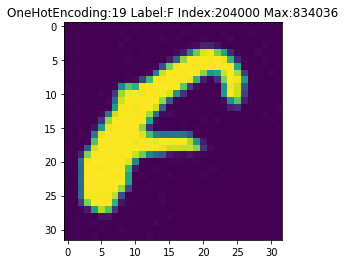

In [86]:
#@title 기본 제목 텍스트
number_of_dataset = 204000 #@param {type:"integer"}
import matplotlib.pyplot as plt
plt.imshow(X_train[number_of_dataset])
plt.title(f"OneHotEncoding:{Y_train_one_hot[number_of_dataset]} Label:{Y_train[number_of_dataset]} Index:{number_of_dataset} Max:{len(X_train)}")

이미지를 KNN 알고리즘에 적용하기 위해 1차원의 배열로 변환합니다.

In [ ]:
import numpy as np

width = X_train[0].shape[0]
height = X_train[0].shape[1]

X_train = np.array(X_train)
X_train = X_train.reshape(-1, width * height)

## **모델 학습하기**

<img src="https://raw.githubusercontent.com/rzbsys/EMNSIT-KNN-Example/main/sklearn.png" align="left" height="150px"/>

실제 코딩을 하며 필요한 인공지능 모델을 그때마다 구현하는 것은 현실적으로 불가능하고 매우 비효율적입니다. 이를 해결하기 위해 Scikit-Learn 라이브러리는 한줄로 여러 인공지능 모델을 구현할 수 있도록 합니다. 

Scikit-Learn 알고리즘을 사용하여 모델 학습을 진행합니다. 

**n_neighbors**은 새로운 점을 판단할 때 몇개의 이웃을 고려할지 결정하는 변수입니다. 이 변수에 따라 모델의 성능이 크게 차이날 수 있습니다.

**weights**는 가중치를 설정하는 방법으로 uniform으로 설정 시 가중치를 고려하지 않습니다. distance로 설정 시 가까운 거리에 있을 수록 더욱 높은 가중치를 부여합니다.

In [46]:
#@title 모델 학습 진행
n_neighbors = 6 #@param {type:"integer"}
weights = "uniform" #@param ["uniform", "distance"]


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6, weights=weights)
classifier.fit(X_train, Y_train_one_hot)

KNeighborsClassifier(n_neighbors=6)

## **모델 검증하기**

예시 이미지 다운로드 : https://raw.githubusercontent.com/rzbsys/EMNSIT-KNN-Example/main/test.png

Saving ewadawdawda.png to ewadawdawda.png


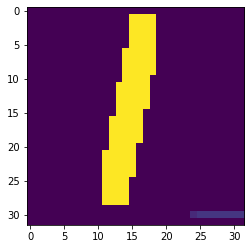

In [80]:
#@title 이미지 파일 업로드
from google.colab import files
filename = files.upload()
filename = list(filename.keys())[0]
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [82]:
#@title 업로드한 이미지 예측하기
img = img.reshape(-1, 32 * 32) / 255.0
pred = classifier.predict(img)
encoder.inverse_transform(pred)[0]

'1'